In [27]:
%%capture
import os
import sys
%load_ext autoreload
%autoreload 2
from __init__ import root_dir, data_path
sys.path.append(os.path.join(root_dir,'dataset_management', 'merging'))
from merging_code import find_file, DataMerging
from helper import co2_calculator

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime

In [3]:
search_path = os.path.join(root_dir,'dataset_management','data','raw')
merging_energy = DataMerging(search_path)

In [4]:
import os

In [5]:
usecolumns = [ 'MTU', 'Biomass  - Actual Aggregated [MW]',
               'Fossil Gas  - Actual Aggregated [MW]',
               'Fossil Hard coal  - Actual Aggregated [MW]',
               'Fossil Oil  - Actual Aggregated [MW]',
               'Waste  - Actual Aggregated [MW]',
               'Wind Offshore  - Actual Aggregated [MW]',
               'Wind Onshore  - Actual Aggregated [MW]',
               'Solar  - Actual Aggregated [MW]'
            ]

In [28]:
df_energy = pd.DataFrame()
for file_name in os.listdir(os.path.join(search_path,'energy_data')):
    df3 = merging_energy.energy_data_timestamp(file_name,columns=usecolumns)
    df_energy = pd.concat([df_energy, df3], ignore_index=False)

In [29]:
df_energy.sort_index(inplace=True)

In [30]:
df_energy.head()

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
Timestamp,,,,,,,,
2018-01-01 00:00:00,387.0,79.0,69.0,27.0,0.0,51.0,294.0,364.0
2018-01-01 01:00:00,388.0,73.0,69.0,27.0,0.0,51.0,255.0,363.0
2018-01-01 02:00:00,387.0,72.0,68.0,27.0,0.0,51.0,307.0,363.0
2018-01-01 03:00:00,387.0,73.0,68.0,27.0,0.0,50.0,364.0,379.0
2018-01-01 04:00:00,380.0,70.0,71.0,27.0,0.0,51.0,347.0,384.0


In [31]:
df_clean = pd.read_csv(os.path.join(root_dir,'dataset_management','data','clean','clean.csv'), index_col=0, parse_dates=True)

In [32]:
energy_data = pd.merge(df_energy, df_clean[['Actual_Load','Day_Ahead_price']], left_index=True, right_index=True)

In [33]:
energy_data.head()

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Actual_Load,Day_Ahead_price
Timestamp,,,,,,,,,,
2018-01-02 00:00:00,373.0,81.0,67.0,27.0,0.0,56.0,237.0,217.0,1245.0,18.12
2018-01-02 01:00:00,373.0,79.0,64.0,27.0,0.0,56.0,197.0,214.0,1203.0,14.99
2018-01-02 02:00:00,373.0,78.0,63.0,26.0,0.0,57.0,130.0,197.0,1178.0,17.79
2018-01-02 03:00:00,373.0,77.0,70.0,26.0,0.0,58.0,86.0,167.0,1180.0,24.51
2018-01-02 04:00:00,374.0,78.0,62.0,25.0,0.0,58.0,62.0,143.0,1247.0,17.82


In [34]:
energy_data.columns

Index(['Biomass  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]', 'Actual_Load',
       'Day_Ahead_price'],
      dtype='object')

In [35]:
energy_data['Renew Total'] =  energy_data[['Biomass  - Actual Aggregated [MW]', 'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]','Wind Offshore  - Actual Aggregated [MW]', 'Wind Onshore  - Actual Aggregated [MW]']].sum(axis = 1)
energy_data['NonRenew Total'] =  energy_data[['Fossil Gas  - Actual Aggregated [MW]', 'Fossil Hard coal  - Actual Aggregated [MW]', 'Fossil Oil  - Actual Aggregated [MW]']].sum(axis = 1)
energy_data['Others'] = energy_data['Actual_Load'] - (energy_data['Renew Total'] + energy_data['NonRenew Total'])

In [36]:
energy_data['Renew_perc'] = energy_data[['Biomass  - Actual Aggregated [MW]', 'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
                                         'Wind Offshore  - Actual Aggregated [MW]', 'Wind Onshore  - Actual Aggregated [MW]']].sum(axis = 1) / energy_data['Actual_Load']
energy_data['NonRenew_perc'] = energy_data[['Fossil Gas  - Actual Aggregated [MW]', 'Fossil Hard coal  - Actual Aggregated [MW]', 'Fossil Oil  - Actual Aggregated [MW]']].sum(axis = 1) / energy_data['Actual_Load']
energy_data['Others_perc'] = energy_data[['Others']].sum(axis = 1) / energy_data['Actual_Load']

In [37]:
energy_data.columns[:8]

Index(['Biomass  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]'],
      dtype='object')

In [38]:
co2_emissions_prices = [230, 457, 914, 1437, 36, 230, 13, 13]
co2_emissions = dict(zip(energy_data.columns[:8],co2_emissions_prices))
co2_emissions

{'Biomass  - Actual Aggregated [MW]': 230,
 'Fossil Gas  - Actual Aggregated [MW]': 457,
 'Fossil Hard coal  - Actual Aggregated [MW]': 914,
 'Fossil Oil  - Actual Aggregated [MW]': 1437,
 'Solar  - Actual Aggregated [MW]': 36,
 'Waste  - Actual Aggregated [MW]': 230,
 'Wind Offshore  - Actual Aggregated [MW]': 13,
 'Wind Onshore  - Actual Aggregated [MW]': 13}

In [39]:
energy_data[energy_data.columns[:8]] = energy_data[energy_data.columns[:8]].apply(lambda row: row.astype(float))

In [40]:
co2_calculator(energy_data, co2_emissions, 'renew')

In [41]:
co2_calculator(energy_data, co2_emissions, 'non_renew')

In [42]:
co2_calculator(energy_data, co2_emissions, 'total')

In [43]:
energy_data.head()

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Actual_Load,Day_Ahead_price,Renew Total,NonRenew Total,Others,Renew_perc,NonRenew_perc,Others_perc,Renew_CO2_emissions,NonRenew_CO2_emissions,Total_CO2_emissions
Timestamp,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,373.0,81.0,67.0,27.0,0.0,56.0,237.0,217.0,1245.0,18.12,883.0,175.0,187.0,0.709237,0.140562,0.150201,104.572,137.054,241.626
2018-01-02 01:00:00,373.0,79.0,64.0,27.0,0.0,56.0,197.0,214.0,1203.0,14.99,840.0,170.0,193.0,0.698254,0.141313,0.160432,104.013,133.398,237.411
2018-01-02 02:00:00,373.0,78.0,63.0,26.0,0.0,57.0,130.0,197.0,1178.0,17.79,757.0,167.0,254.0,0.642615,0.141766,0.215620,103.151,130.590,233.741
2018-01-02 03:00:00,373.0,77.0,70.0,26.0,0.0,58.0,86.0,167.0,1180.0,24.51,684.0,173.0,323.0,0.579661,0.146610,0.273729,102.419,136.531,238.950
2018-01-02 04:00:00,374.0,78.0,62.0,25.0,0.0,58.0,62.0,143.0,1247.0,17.82,637.0,165.0,445.0,0.510826,0.132318,0.356856,102.025,128.239,230.264


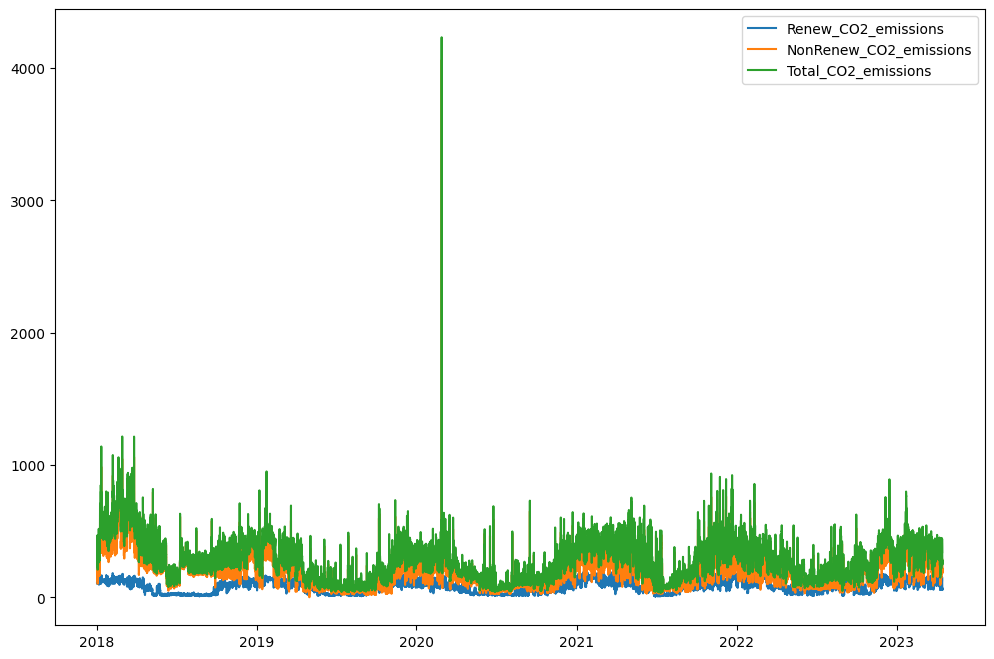

In [25]:
plt.figure(figsize=(12,8))
plt.plot(energy_data['Renew_CO2_emissions'], label="Renew_CO2_emissions")
plt.plot(energy_data['NonRenew_CO2_emissions'], label="NonRenew_CO2_emissions")
plt.plot(energy_data['Total_CO2_emissions'], label="Total_CO2_emissions")
plt.legend()

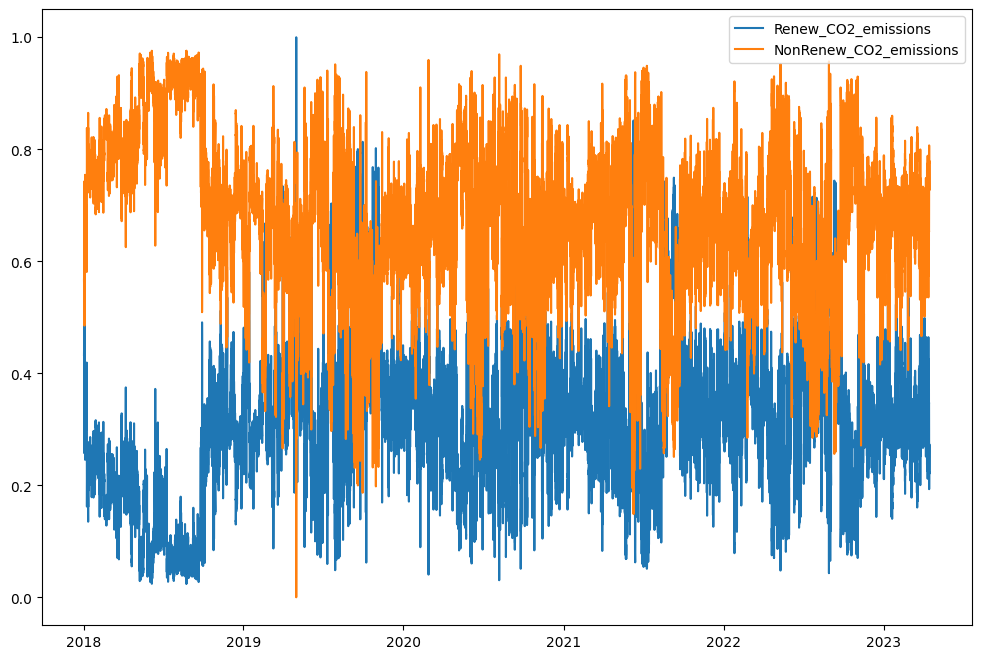

In [26]:
plt.figure(figsize=(12,8))
plt.plot(energy_data['Renew_CO2_emissions']/energy_data['Total_CO2_emissions'], label="Renew_CO2_emissions")
plt.plot(energy_data['NonRenew_CO2_emissions']/energy_data['Total_CO2_emissions'], label="NonRenew_CO2_emissions")
plt.legend()